# Autocorrelation for Switch

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k_b=10
k_d=1
T_max = 25/k_d

In [3]:
c_b = .5
c_f = .5

In [4]:
q_b = c_f
q_d = c_b+c_f

In [5]:
dt = .01;
nreps = 10000
tau = 1/k_d
mu = np.zeros(int(T_max/dt))
sq = np.zeros(int(T_max/dt))
X = np.zeros([nreps,int(T_max/dt)])
j=0

for rep in range(nreps):
    i=0
    x=0
    q0 = 1
    q1 = 1-q0
    t=0
    while t<T_max:
        [r1,r2]=np.random.rand(2)
        p1 = c_f*q0
        p2 = c_b*q1
        p3 = k_b*q1
        p4 = k_d*x
        p_net = p1+p2+p3+p4
        t_react = -np.log(r1)/p_net
        t=t+t_react
    
        while i<np.min([int(t/dt),int(T_max/dt)]):
            mu[i]=mu[i]+x
            sq[i]=sq[i]+x**2
            X[rep][i]=x
            i=i+1

        if r2<p1/p_net:
            q1=1
            q0=0
        
        elif r2<(p1+p2)/p_net:
            q1=0
            q0=1
    
        elif r2<(p1+p2+p3)/p_net:
            x=x+1
        
        else:
            x=x-1
            
mu = np.array(mu)/nreps
sigma = np.array(sq)/nreps - mu**2

In [6]:
def var_pulse(t):
    t=t*dt
    res1 = -25*np.exp(-2*t)*(-1+np.exp(t)-t)**2+42.5*np.exp(-2*t)*(0.2941-1.294*np.exp(t)+np.exp(2*t)+0.588*t-1.294*np.exp(t)*t)
    return(res1)

def mu_pulse(t):
    t=t*dt
    return(5*np.exp(-t)*(-1+np.exp(t)-t))

In [7]:
mu=mu[:1000]
sigma=sigma[:1000]

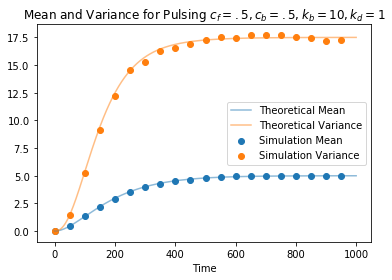

In [8]:
plt.scatter(np.arange(0,len(mu[::50]))*50,mu[::50],label="Simulation Mean")
plt.scatter(np.arange(0,len(sigma[::50]))*50,sigma[::50],label="Simulation Variance")
plt.plot([mu_pulse(t) for t in range(1000)],label="Theoretical Mean",alpha=.5)
plt.plot([var_pulse(t) for t in range(1000)],label="Theoretical Variance",alpha=.5)
plt.xlabel("Time")
plt.title("Mean and Variance for Pulsing $c_f=.5,c_b=.5,k_b=10,k_d=1$")
plt.legend()